In [1]:
import pandas as pd
data=pd.read_csv("생활인구 회귀.csv",encoding='CP949')

In [2]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import accuracy_score
from sklearn.metrics import mean_squared_error,r2_score
import numpy as np

In [3]:
data.columns

Index(['Unnamed: 0', '시도', '시군구', '읍면동', '행정동 코드', '병원', '학교', '학원', '문화시설',
       '관광명소', '대형마트', '편의점', '지하철', '음식점', '카페', '2022년06월_총인구수', '위도', '경도',
       '토지 매매가', '총생활인구수'],
      dtype='object')

In [4]:
del data['Unnamed: 0']

In [5]:
y=data['총생활인구수']
x=data.drop(columns=['총생활인구수','시도','시군구','읍면동',
                     '행정동 코드','위도', '경도'])

In [6]:
import numpy as np
np.random.seed(1003)

In [7]:
from sklearn.model_selection import train_test_split
X_train,X_validation,y_train,y_validation=train_test_split(
    x,y,test_size=0.2,random_state=1003)

In [8]:
print(X_train.isnull().sum())
print(len(X_train.columns))

병원               0
학교               0
학원               0
문화시설             0
관광명소             0
대형마트             0
편의점              0
지하철              0
음식점              0
카페               0
2022년06월_총인구수    0
토지 매매가           0
dtype: int64
12


## 1.랜덤 포레스트 회귀

In [9]:
regressor=RandomForestRegressor()
regressor.fit(X_train, y_train)
y_pred = regressor.predict(X_validation)

mse = np.sqrt(mean_squared_error(y_pred, y_validation))
r2=r2_score(y_validation,y_pred)
errors=abs(y_validation-y_pred)
mape=100*(errors/y_validation)
accuracy=100-np.mean(mape)

print('평균제곱근오차 : ', mse)
print("r-square:",r2)
print("accuracy:",accuracy)

평균제곱근오차 :  8029559.659981156
r-square: 0.7189530101754633
accuracy: 80.41087082268236


In [10]:
pd.options.display.float_format = '{:.5f}'.format
comparison=pd.DataFrame({'y_pred':y_pred,'y_validation':y_validation})
comparison['차이']=abs(comparison['y_validation']-comparison['y_pred'])
comparison

,y_pred,y_validation,차이
60,34285693.15500,27588094.80000,6697598.35500
344,30961411.26910,28608749.97000,2352661.29910
134,35774971.35540,26510476.01000,9264495.34540
384,48177095.25070,43215907.82000,4961187.43070
104,23987515.30510,25684739.23000,1697223.92490
...,...,...,...
227,33769134.01210,25567513.50000,8201620.51210
150,31832759.25100,31350544.67000,482214.58100
24,23629136.97920,31349333.46000,7720196.48080
373,15816443.31054,17272543.56000,1456100.24946


feature importance 시각화

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

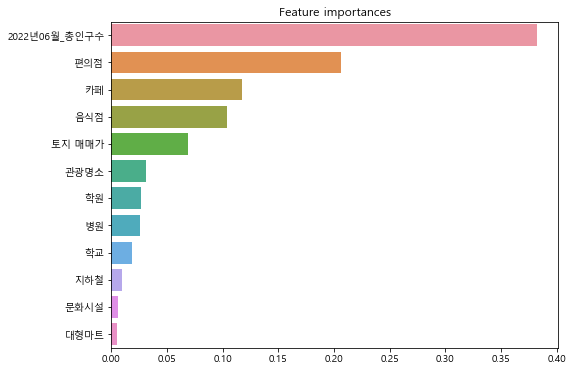

In [12]:
plt.rcParams['font.family'] ='Malgun Gothic'

plt.rcParams['axes.unicode_minus'] =False

importances_values = regressor.feature_importances_
importances = pd.Series(importances_values, index=X_train.columns)
top20 = importances.sort_values(ascending=False)[:20]
plt.figure(figsize=(8, 6))
plt.title('Feature importances')
sns.barplot(x = top20, y = top20.index)
plt.show()

파라미터 튜닝

In [13]:
from sklearn.model_selection import GridSearchCV
 
param_grid = [
        {'n_estimators': [100,150,200,250,300], 'max_features': [6, 8,9,10,11,12]},
        {'bootstrap': [False], 'n_estimators': [3, 10], 'max_features': [2, 3, 4]},
    ]
 
grid_search = GridSearchCV(regressor, param_grid, cv=5,
                           scoring='neg_mean_squared_error',
                           return_train_score=True)
 
grid_search.fit(X_train, y_train)

print('최적 하이퍼 파라미터: ', grid_search.best_params_)

최적 하이퍼 파라미터:  {'max_features': 6, 'n_estimators': 300}


In [14]:
from sklearn.model_selection import GridSearchCV
 
param_grid = [
        {'n_estimators': [30,40,50,60,70], 'max_features': [8,9,10,11,12]}
    ]
 
grid_search = GridSearchCV(regressor, param_grid, cv=5,
                           scoring='neg_mean_squared_error',
                           return_train_score=True)
 
grid_search.fit(X_train, y_train)

print('최적 하이퍼 파라미터: ', grid_search.best_params_)

최적 하이퍼 파라미터:  {'max_features': 12, 'n_estimators': 70}


파라미터 튜닝 적용해서 구해보기 

In [34]:
regressor=RandomForestRegressor(n_estimators=300,max_features=6)
regressor.fit(X_train, y_train)
y_pred = regressor.predict(X_validation)

mse = np.sqrt(mean_squared_error(y_pred, y_validation))
r2=r2_score(y_validation,y_pred)
errors=abs(y_validation-y_pred)
mape=100*(errors/y_validation)
accuracy=100-np.mean(mape)

print('평균제곱근오차 : ', mse)
print("r-square:",r2)
print("accuracy:",accuracy)
print("아까 30, 9 평균제곱근오차 :  9827712.721076937")
print("아까 300, 6 평균제곱근오차 : 9559026.801769411 ")

평균제곱근오차 :  8070226.062049624
r-square: 0.7160990275449921
accuracy: 79.35949957431386
아까 30, 9 평균제곱근오차 :  9827712.721076937
아까 300, 6 평균제곱근오차 : 9559026.801769411 


In [35]:
pd.options.display.float_format = '{:.5f}'.format
comparison=pd.DataFrame({'y_pred':y_pred,'y_validation':y_validation})
comparison['차이']=abs(comparison['y_validation']-comparison['y_pred'])
comparison.head(83)

,y_pred,y_validation,차이
60,36083479.84410,27588094.80000,8495385.04410
344,34000671.49123,28608749.97000,5391921.52123
134,32988128.78797,26510476.01000,6477652.77797
384,51386812.68160,43215907.82000,8170904.86160
104,26390696.56140,25684739.23000,705957.33140
...,...,...,...
227,33932389.89663,25567513.50000,8364876.39663
150,30700411.54757,31350544.67000,650133.12243
24,23731388.81095,31349333.46000,7617944.64905
373,16314313.10390,17272543.56000,958230.45610


In [36]:
y=data['총생활인구수']
x=data[['2022년06월_총인구수','편의점','카페','음식점','토지 매매가']]

In [37]:
from sklearn.model_selection import train_test_split
X_train,X_validation,y_train,y_validation=train_test_split(
    x,y,test_size=0.2,random_state=1003)

regressor=RandomForestRegressor(n_estimators=300,max_features=3)

평균제곱근오차 :  7940168.843873088

r-square: 0.7251758112024487

accuracy: 80.54889249838891

In [49]:
regressor=RandomForestRegressor(n_estimators=300,max_features=3)
regressor.fit(X_train, y_train)
y_pred = regressor.predict(X_validation)

mse = np.sqrt(mean_squared_error(y_pred, y_validation))
r2=r2_score(y_validation,y_pred)
errors=abs(y_validation-y_pred)
mape=100*(errors/y_validation)
accuracy=100-np.mean(mape)

print('평균제곱근오차 : ', mse)
print("r-square:",r2)
print("accuracy:",accuracy)

평균제곱근오차 :  7960927.194103136
r-square: 0.7237369616861093
accuracy: 80.67996688106766


In [45]:
from sklearn.model_selection import GridSearchCV
 
param_grid = [
        {'n_estimators': [300,350,400], 'max_features': [2,3,4,5],
        'min_samples_leaf':[8,12,18],'min_samples_split':[8,16,20]}
    ]
 
grid_search = GridSearchCV(regressor, param_grid, cv=5,
                           scoring='neg_mean_squared_error',
                           return_train_score=True)
 
grid_search.fit(X_train, y_train)

print('최적 하이퍼 파라미터: ', grid_search.best_params_)

최적 하이퍼 파라미터:  {'max_features': 4, 'min_samples_leaf': 8, 'min_samples_split': 8, 'n_estimators': 300}


## 2. 의사결정트리 회귀

In [17]:
from sklearn.tree import DecisionTreeRegressor

In [43]:
model = DecisionTreeRegressor()
model.fit(X_train, y_train)
y_pred = model.predict(X_validation)

mse = np.sqrt(mean_squared_error(y_pred, y_validation))
r2=r2_score(y_validation,y_pred)
errors=abs(y_validation-y_pred)
mape=100*(errors/y_validation)
accuracy=100-np.mean(mape)

print('평균제곱근오차 : ', mse)
print("r-square:",r2)
print("accuracy:",accuracy)

평균제곱근오차 :  11756909.03112994
r-square: 0.3974656714345569
accuracy: 73.74360459543752


In [19]:
pd.options.display.float_format = '{:.5f}'.format
comparison=pd.DataFrame({'y_pred':y_pred,'y_validation':y_validation})
comparison['차이']=abs(comparison['y_validation']-comparison['y_pred'])
comparison

,y_pred,y_validation,차이
60,33774193.07000,27588094.80000,6186098.27000
344,24033932.24000,28608749.97000,4574817.73000
134,35927237.98000,26510476.01000,9416761.97000
384,47329870.98000,43215907.82000,4113963.16000
104,24033932.24000,25684739.23000,1650806.99000
...,...,...,...
227,32899973.27000,25567513.50000,7332459.77000
150,35209285.37000,31350544.67000,3858740.70000
24,23641455.13000,31349333.46000,7707878.33000
373,13194218.99000,17272543.56000,4078324.57000


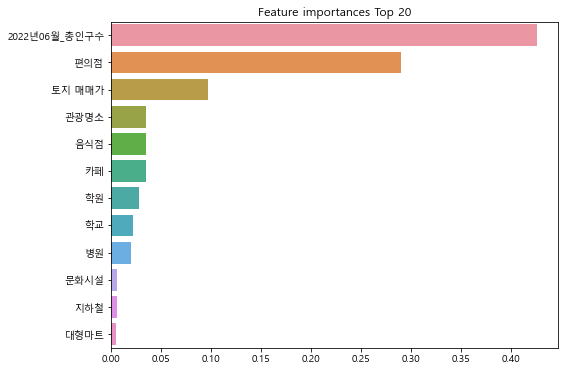

In [20]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

plt.rcParams['font.family'] ='Malgun Gothic'

plt.rcParams['axes.unicode_minus'] =False

importances_values = model.feature_importances_
importances = pd.Series(importances_values, index=X_train.columns)
top20 = importances.sort_values(ascending=False)[:20]
plt.figure(figsize=(8, 6))
plt.title('Feature importances Top 20')
sns.barplot(x = top20, y = top20.index)
plt.show()

## 3. svm

In [44]:
from sklearn import svm
model = svm.SVR()
model.fit(X_train, y_train)
y_pred=model.predict(X_validation)

mse = np.sqrt(mean_squared_error(y_pred, y_validation))
r2=r2_score(y_validation,y_pred)
errors=abs(y_validation-y_pred)
mape=100*(errors/y_validation)
accuracy=100-np.mean(mape)

print('평균제곱근오차 : ', mse)
print("r-square:",r2)
print("accuracy:",accuracy)

print('평균제곱근오차 : ', mse)

평균제곱근오차 :  15710056.200043878
r-square: -0.07584809913968327
accuracy: 59.13980930528717
평균제곱근오차 :  15710056.200043878


In [22]:
pd.options.display.float_format = '{:.5f}'.format
comparison=pd.DataFrame({'y_pred':y_pred,'y_validation':y_validation})
comparison['차이']=abs(comparison['y_validation']-comparison['y_pred'])
comparison

,y_pred,y_validation,차이
60,29427226.13686,27588094.80000,1839131.33686
344,29427236.76998,28608749.97000,818486.79998
134,29427244.04149,26510476.01000,2916768.03149
384,29427286.94135,43215907.82000,13788620.87865
104,29427236.31039,25684739.23000,3742497.08039
...,...,...,...
227,29427242.47169,25567513.50000,3859728.97169
150,29427247.81348,31350544.67000,1923296.85652
24,29427209.79973,31349333.46000,1922123.66027
373,29427216.42825,17272543.56000,12154672.86825
